In [4]:
library(ggplot2)
library(ggalluvial)

In [5]:
#install.packages("ggalluvial")

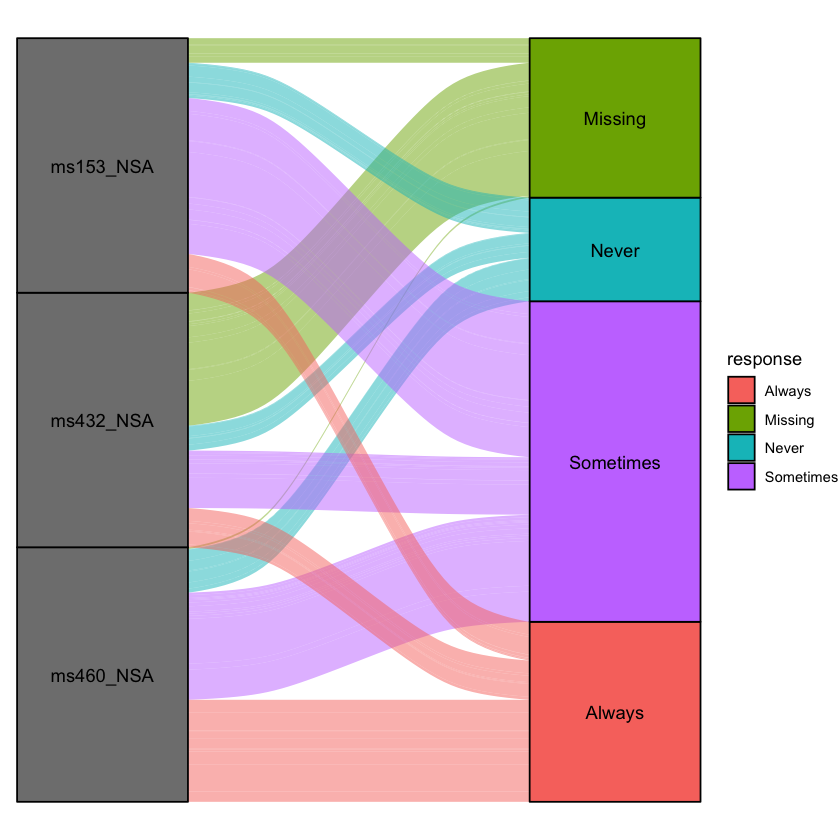

In [8]:
ggplot(data = vaccinations,
       aes(axis1 = survey, axis2 = response, y = freq)) +
  geom_alluvium(aes(fill = response)) +
  geom_stratum(aes(fill = response)) +
  geom_text(stat = "stratum",
            aes(label = after_stat(stratum))) +
  scale_x_discrete(limits = c("Survey", "Response"),
                   expand = c(0.15, 0.05)) +
  theme_void()

In [11]:
head(vaccinations)

,survey,freq,subject,response,start_date,end_date
,<fct>,<int>,<int>,<fct>,<date>,<date>
1,ms153_NSA,48,1,Always,2010-09-22,2010-10-25
2,ms153_NSA,9,2,Always,2010-09-22,2010-10-25
3,ms153_NSA,66,3,Always,2010-09-22,2010-10-25
4,ms153_NSA,1,4,Always,2010-09-22,2010-10-25
5,ms153_NSA,11,5,Always,2010-09-22,2010-10-25
6,ms153_NSA,1,6,Always,2010-09-22,2010-10-25


In [10]:
chords_data = read.csv('plots/chord_data/COO.csv')
chords_data

from_territory,to_territory,value
<chr>,<chr>,<dbl>
Gaza supply,Gaza demand,556.0467
Israel supply,Gaza demand,1297.4424
Israel supply,Israel demand,23437.5725
Israel supply,Jordan demand,9797.8778
Israel supply,West Bank demand,4232.1285
Jordan supply,Israel demand,47113.0531
Jordan supply,Jordan demand,17631.4257
Jordan supply,West Bank demand,758.0346
Israel supply,Israel demand,19347.3930


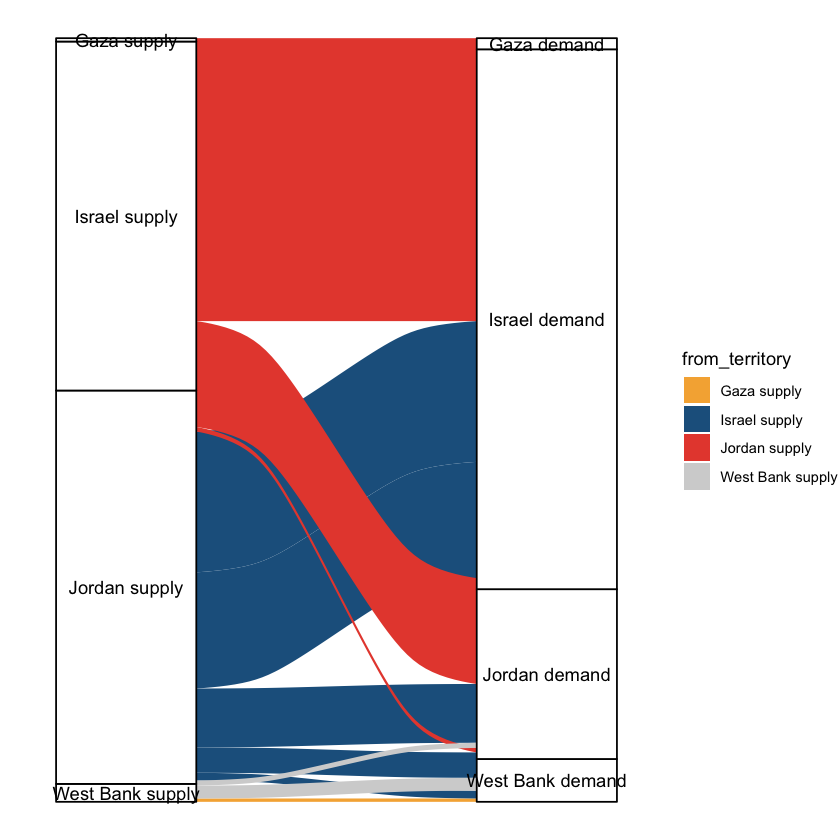

In [73]:
ggplot(data = chords_data,
       aes(axis1 = from_territory, 
           axis2 = to_territory, 
           y = value
          )
    ) +
    geom_alluvium(aes(fill = from_territory),
                  alpha = 1, 
                  decreasing = FALSE,
                  aes.bind='none',
                  #width = 1/20,
                  #knot.pos = 1, 
                  #knot.prop = FALSE
    ) +
    geom_stratum(color='black',
                 fill='white',
                 aes(fill = from_territory)
    ) +
    scale_fill_manual(values = c(# Gaza
                               "#f5b041",
                               # Israel
                               "#1f618d",
                               # Jordan
                               "#e74c3c",
                               # total
                               "lightgray",
                               # west bank
                               "#16a085")
    ) +
    geom_text(stat = "stratum",
              aes(label = after_stat(stratum))
    ) +
    scale_x_discrete(limits = c("Generation", "Demand"),
                     expand = c(0.25, 0.05)
    ) +
    theme_void(
    ) + 
    labs(x = "from_id")

# save figure
ggsave("../outputs/figures/oms_sankey.png", 
       width = 22.5, 
       height = 12.5, 
       units = "cm")